# Simulação de Cadeia de Markov

Este notebook tem por objetivo a análise de um processo estocástico discreto, especificamente uma cadeia de Markov homogênea de tempo discreto com três estados. A análise inclui: construção da matriz de transição, obtenção da distribuição estacionária, cálculo de probabilidades de transição em múltiplos passos e representação gráfica do processo.

## Imports

In [81]:
import numpy as np                     # Operações matriciais e vetoriais
import matplotlib.pyplot as plt        # Visualização de gráficos
from numpy.linalg import matrix_power # Potenciação de matriz de transição
import networkx as nx                 # Visualização de grafos direcionados

## Questão 01

## a) Matriz de Transição

A matriz de transição `P` representa as probabilidades de mudança de um estado para outro com base no diagrama fornecido.

In [82]:
np.set_printoptions(precision=4, suppress=True)

P = np.array([
    [0.5, 0.5, 0.0],     # Estado 0
    [0.0, 1/3, 2/3],     # Estado 1
    [0.0, 0.5, 0.5]      # Estado 2
])

print("Matriz de transição P:")
print(P)


Matriz de transição P:
[[0.5    0.5    0.    ]
 [0.     0.3333 0.6667]
 [0.     0.5    0.5   ]]


## b) Cálculo do Regime Permanente de cada estado

A distribuição estacionária $\pi$ satisfaz:

$$
\pi P = \pi \quad \text{e} \quad \sum_{i=0}^{n} \pi_i = 1
$$


In [83]:
A = np.transpose(P) - np.eye(3)
A = np.vstack((A, np.ones(3)))
b = np.array([0, 0, 0, 1])

pi = np.linalg.lstsq(A, b, rcond=None)[0]
print("Distribuição estacionária de cada estado:")
print(pi)

Distribuição estacionária de cada estado:
[0.     0.4286 0.5714]


## c) Probabilidade de Retornar ao Estado 0 em 3 Passos

Calculamos a probabilidade de sair do estado 0 e retornar ao estado 0 após exatamente 3 transições.


In [84]:
P3 = matrix_power(P, 3)
p_00 = P3[0, 0]

print(f"Probabilidade de retornar ao estado 0 em 3 passos: {p_00:.4f}")

Probabilidade de retornar ao estado 0 em 3 passos: 0.1250


## d) Probabilidade de Estar no Estado 2 em 5 Passos

A seguir, verificamos a probabilidade de ir do estado 0 ao estado 2 após 5 passos.

In [85]:
P5 = matrix_power(P, 5)
p_02 = P5[0, 2]

print(f"Probabilidade de estar no estado 2 após 5 passos (iniciando no estado 0): {p_02:.4f}")

Probabilidade de estar no estado 2 após 5 passos (iniciando no estado 0): 0.5401


## Questão 02

## a) O diagrama de transição de estados que representa o processo de transmissão está apresentado ao final da questão, pois sua construção depende da definição prévia da matriz de transição.

## b) A matriz de transicao de estados

In [86]:
# Probabilidade de erro
p = 0.2

# Probabilidade de NÃO haver erro
p_no_error = 1 - p   # 0.8

# Probabilidade de cada vizinho (se houver erro): p/2 = 0.1
# Matriz de transição (P[i][j] = probabilidade de i virar j)

P = np.array([
    [0.8, 0.1, 0.0, 0.1],  # S0 → [S0, S1, --, S3]
    [0.1, 0.8, 0.1, 0.0],  # S1 → [S0, S1, S2, --]
    [0.0, 0.1, 0.8, 0.1],  # S2 → [--, S1, S2, S3]
    [0.1, 0.0, 0.1, 0.8],  # S3 → [S0, --, S2, S3]
])

print("Matriz de transição:")
print(P)

Matriz de transição:
[[0.8 0.1 0.  0.1]
 [0.1 0.8 0.1 0. ]
 [0.  0.1 0.8 0.1]
 [0.1 0.  0.1 0.8]]


## c) Dado que o smbolo S2 foi transmitido, qual a probabilidade de nao haver um erro ate a sada do terceiro estagio

In [87]:
from numpy.linalg import matrix_power

# Calcula P^3
P3 = matrix_power(P, 3)

# Probabilidade de permanecer em S2 após 3 estágios
prob_s2_s2 = P3[2, 2]
print(f"Probabilidade de sair de S2 e continuar em S2 após 3 estágios: {prob_s2_s2:.4f}")

Probabilidade de sair de S2 e continuar em S2 após 3 estágios: 0.5600


## Diagrama

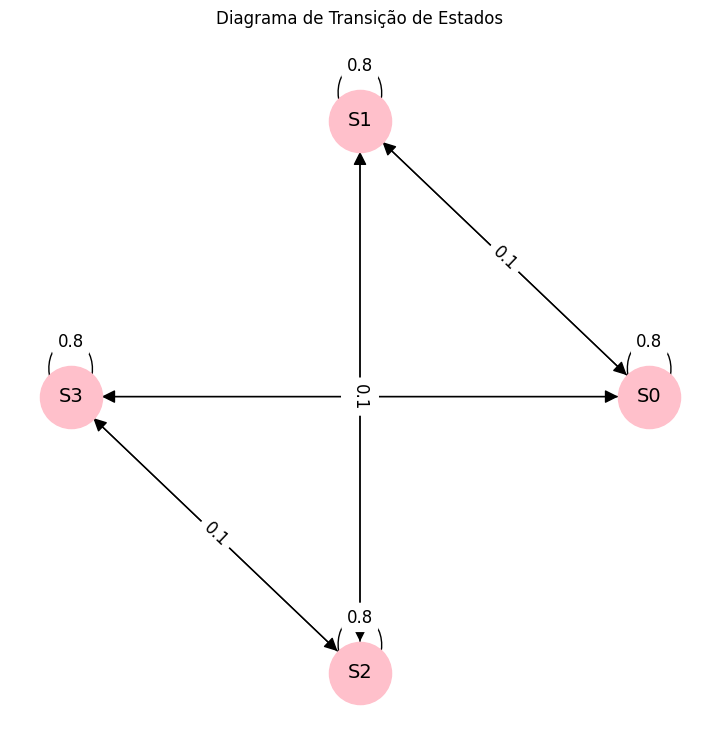

In [88]:
G = nx.DiGraph()
labels = ['S0', 'S1', 'S2', 'S3']

# Adiciona as transições com pesos (> 0)
for i in range(4):
    for j in range(4):
        if P[i, j] > 0:
            G.add_edge(labels[i], labels[j], weight=round(P[i, j], 2))

# Layout circular
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(7, 7))
nx.draw(G, pos, with_labels=True, node_color='pink', node_size=2000, font_size=14, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.title("Diagrama de Transição de Estados")
plt.axis('off')
plt.show()

## Questão 03

## a) O diagrama de transição de estados que representa o processo de transmissão está apresentado ao final da questão, pois sua construção depende da definição prévia da matriz de transição.

## b) Matriz de Transição de 1 Passo

In [89]:
# Matriz de transição P
P = np.zeros((6, 6))

# Estado 0: vizinhos = 1, 2
P[0, 1] = 0.5
P[0, 2] = 0.5

# Estado 1: vizinhos = 0, 3
P[1, 0] = 0.5
P[1, 3] = 0.5

# Estado 2: vizinhos = 0, 4
P[2, 0] = 0.5
P[2, 4] = 0.5

# Estado 3: vizinhos = 1, 5
P[3, 1] = 0.5
P[3, 5] = 0.5

# Estado 4: vizinhos = 2, 5
P[4, 2] = 0.5
P[4, 5] = 0.5

# Estado 5: absorvente
P[5, 5] = 1.0

print("Matriz de transição P:")
print(P)

Matriz de transição P:
[[0.  0.5 0.5 0.  0.  0. ]
 [0.5 0.  0.  0.5 0.  0. ]
 [0.5 0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.5]
 [0.  0.  0.5 0.  0.  0.5]
 [0.  0.  0.  0.  0.  1. ]]


## c) Probabilidade de Morte após 3 Horas

In [90]:
from numpy.linalg import matrix_power

# Vetor de estado inicial: rato começa na sala 0
initial = np.array([1, 0, 0, 0, 0, 0])

# Após 3 passos
P3 = matrix_power(P, 3)
estado_apos_3 = initial @ P3

print("Distribuição após 3 horas:")
print(estado_apos_3)
print(f"\nProbabilidade de estar morto (sala 5): {estado_apos_3[5]:.4f}")


Distribuição após 3 horas:
[0.    0.375 0.375 0.    0.    0.25 ]

Probabilidade de estar morto (sala 5): 0.2500


## d) Comportamento em Regime Permanente

Após muitas horas (n → ∞), o sistema converge para um estado onde toda a massa de probabilidade estará na sala 5 (estado absorvente). Isso ocorre porque o estado 5 é absorvente e todos os outros levam a ele com probabilidade não nula.


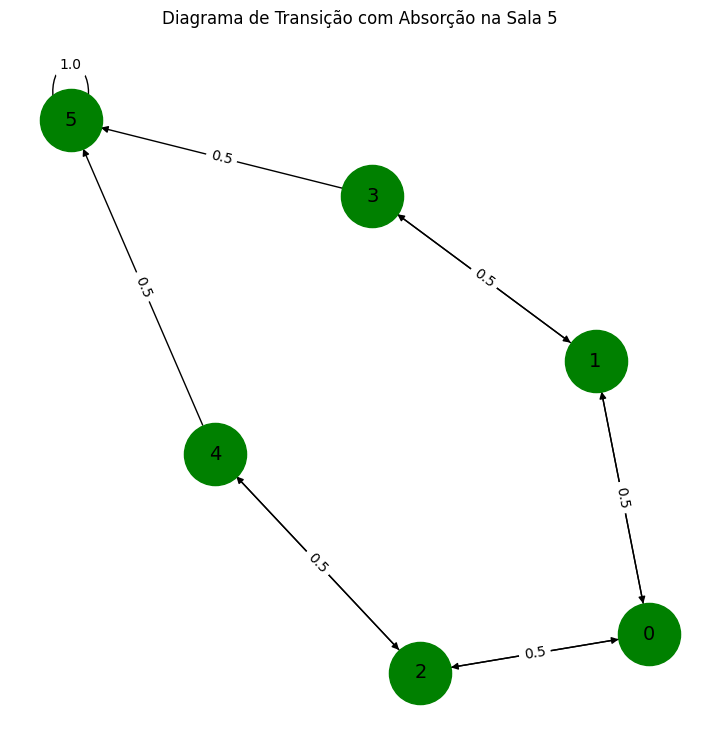

In [91]:
G = nx.DiGraph()
labels = ['0', '1', '2', '3', '4', '5']

# Adiciona transições com peso > 0
for i in range(6):
    for j in range(6):
        if P[i, j] > 0:
            G.add_edge(labels[i], labels[j], weight=P[i, j])

pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(7, 7))
nx.draw(G, pos, with_labels=True, node_color='green', node_size=2000, font_size=14)
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.1f}' for k, v in edge_labels.items()})
plt.title("Diagrama de Transição com Absorção na Sala 5")
plt.show()